In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec
%matplotlib inline

# Set style for better visualization
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5)

/tmp/ipykernel_1768662/554344005.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
# Function to visualize DeepHit model results
def visualize_results(data_mode='METABRIC'):
    in_path = data_mode + '/results/'
    
    # Read the saved results
    df1_mean = pd.read_csv(in_path + '/result_CINDEX_FINAL_MEAN.csv', index_col=0)
    df1_std = pd.read_csv(in_path + '/result_CINDEX_FINAL_STD.csv', index_col=0)
    df2_mean = pd.read_csv(in_path + '/result_BRIER_FINAL_MEAN.csv', index_col=0)
    df2_std = pd.read_csv(in_path + '/result_BRIER_FINAL_STD.csv', index_col=0)
    
    # Get the number of events and evaluation times
    num_events = df1_mean.shape[0]
    eval_times = [int(col.split('yr')[0]) for col in df1_mean.columns]
    
    return df1_mean, df1_std, df2_mean, df2_std, num_events, eval_times

In [4]:
# Load the results
data_mode = 'METABRIC'  # or 'SYNTHETIC'
df1_mean, df1_std, df2_mean, df2_std, num_events, eval_times = visualize_results(data_mode)

# Display the dataframes
print("C-index Mean:")
display(df1_mean)

print("\nC-index Standard Deviation:")
display(df1_std)

print("\nBrier Score Mean:")
display(df2_mean)

print("\nBrier Score Standard Deviation:")
display(df2_std)

C-index Mean:


,144yr c_index,288yr c_index,432yr c_index
Event_1,-1.0,0.850777,0.881452



C-index Standard Deviation:


,144yr c_index,288yr c_index,432yr c_index
Event_1,0.0,0.062833,0.035905



Brier Score Mean:


,144yr B_score,288yr B_score,432yr B_score
Event_1,0.012638,0.033597,0.053708



Brier Score Standard Deviation:


,144yr B_score,288yr B_score,432yr B_score
Event_1,0.002709,0.006745,0.007744


In [5]:
# Load the results
data_mode = 'METABRIC'  # or 'SYNTHETIC'
df1_mean, df1_std, df2_mean, df2_std, num_events, eval_times = visualize_results(data_mode)

# Display the dataframes
print("C-index Mean:")
display(df1_mean)

print("\nC-index Standard Deviation:")
display(df1_std)

print("\nBrier Score Mean:")
display(df2_mean)

print("\nBrier Score Standard Deviation:")
display(df2_std)

C-index Mean:


,144yr c_index,288yr c_index,432yr c_index
Event_1,-1.0,0.850777,0.881452



C-index Standard Deviation:


,144yr c_index,288yr c_index,432yr c_index
Event_1,0.0,0.062833,0.035905



Brier Score Mean:


,144yr B_score,288yr B_score,432yr B_score
Event_1,0.012638,0.033597,0.053708



Brier Score Standard Deviation:


,144yr B_score,288yr B_score,432yr B_score
Event_1,0.002709,0.006745,0.007744


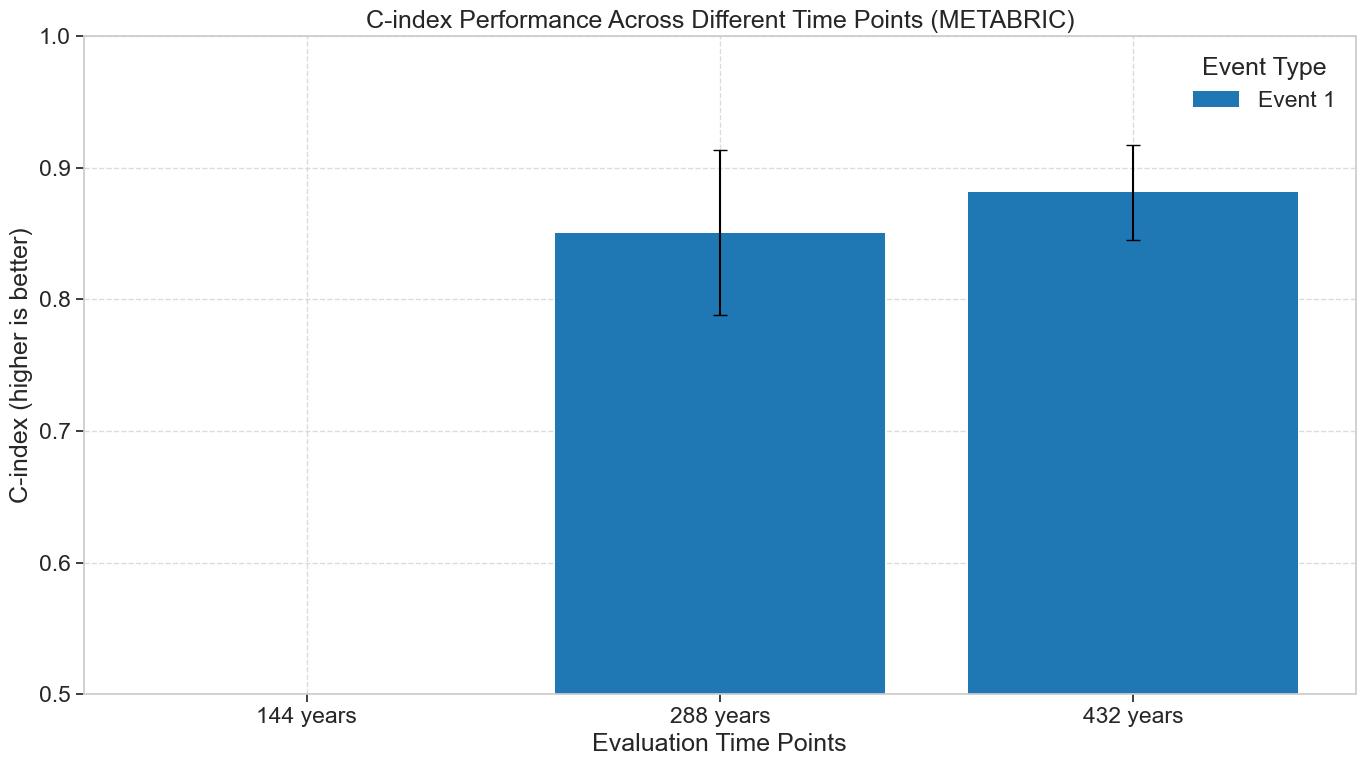

In [6]:
# 1. Bar plot for C-index across different time points
plt.figure(figsize=(14, 8))

x = np.arange(len(eval_times))
width = 0.8 / num_events

for i in range(num_events):
    event_values = df1_mean.iloc[i].values
    event_std = df1_std.iloc[i].values
    plt.bar(x + i*width - 0.4 + width/2, event_values, width, 
            label=f'Event {i+1}', yerr=event_std, capsize=5)

plt.xlabel('Evaluation Time Points')
plt.ylabel('C-index (higher is better)')
plt.title(f'C-index Performance Across Different Time Points ({data_mode})')
plt.xticks(x, [f'{t} years' for t in eval_times])
plt.legend(title='Event Type')
plt.ylim(0.5, 1.0)  # C-index typically ranges from 0.5 to 1.0
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

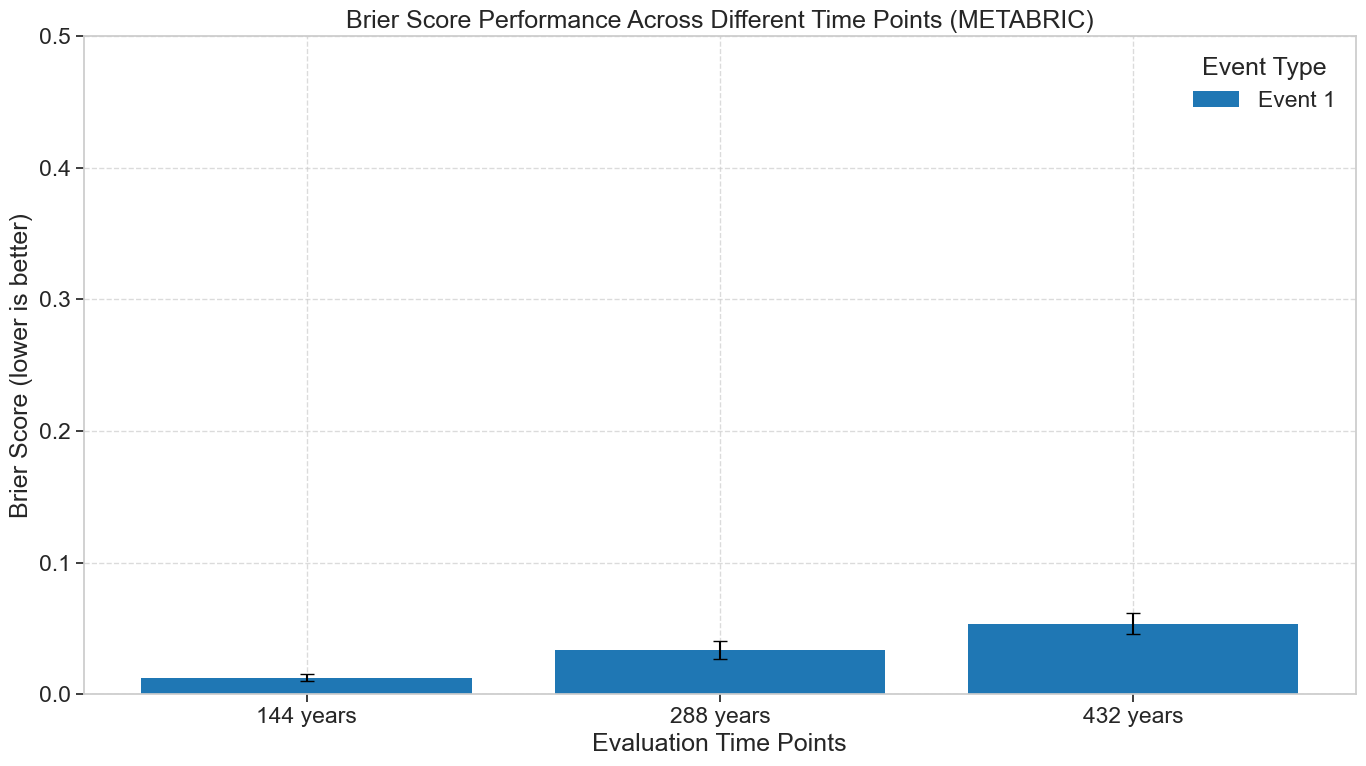

In [7]:
# 2. Bar plot for Brier score across different time points
plt.figure(figsize=(14, 8))

for i in range(num_events):
    event_values = df2_mean.iloc[i].values
    event_std = df2_std.iloc[i].values
    plt.bar(x + i*width - 0.4 + width/2, event_values, width, 
            label=f'Event {i+1}', yerr=event_std, capsize=5)

plt.xlabel('Evaluation Time Points')
plt.ylabel('Brier Score (lower is better)')
plt.title(f'Brier Score Performance Across Different Time Points ({data_mode})')
plt.xticks(x, [f'{t} years' for t in eval_times])
plt.legend(title='Event Type')
plt.ylim(0, 0.5)  # Brier score typically ranges from 0 to 1
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

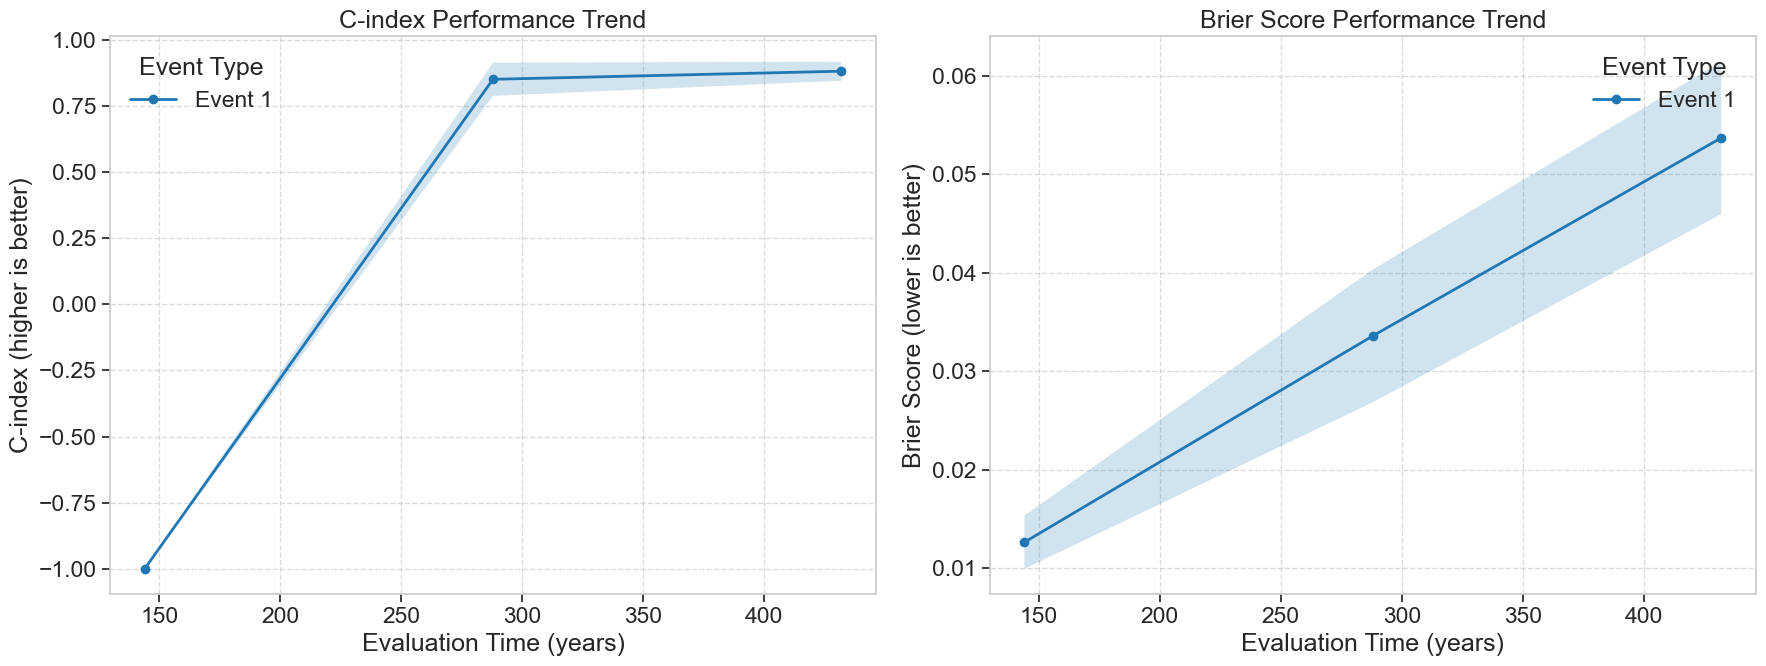

In [8]:
# 3. Line plot showing performance trends over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

for i in range(num_events):
    # C-index
    ax1.plot(eval_times, df1_mean.iloc[i].values, 'o-', linewidth=2, label=f'Event {i+1}')
    ax1.fill_between(eval_times, 
                    df1_mean.iloc[i].values - df1_std.iloc[i].values,
                    df1_mean.iloc[i].values + df1_std.iloc[i].values,
                    alpha=0.2)
    
    # Brier score
    ax2.plot(eval_times, df2_mean.iloc[i].values, 'o-', linewidth=2, label=f'Event {i+1}')
    ax2.fill_between(eval_times, 
                    df2_mean.iloc[i].values - df2_std.iloc[i].values,
                    df2_mean.iloc[i].values + df2_std.iloc[i].values,
                    alpha=0.2)

ax1.set_xlabel('Evaluation Time (years)')
ax1.set_ylabel('C-index (higher is better)')
ax1.set_title('C-index Performance Trend')
ax1.legend(title='Event Type')
ax1.grid(True, linestyle='--', alpha=0.7)

ax2.set_xlabel('Evaluation Time (years)')
ax2.set_ylabel('Brier Score (lower is better)')
ax2.set_title('Brier Score Performance Trend')
ax2.legend(title='Event Type')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

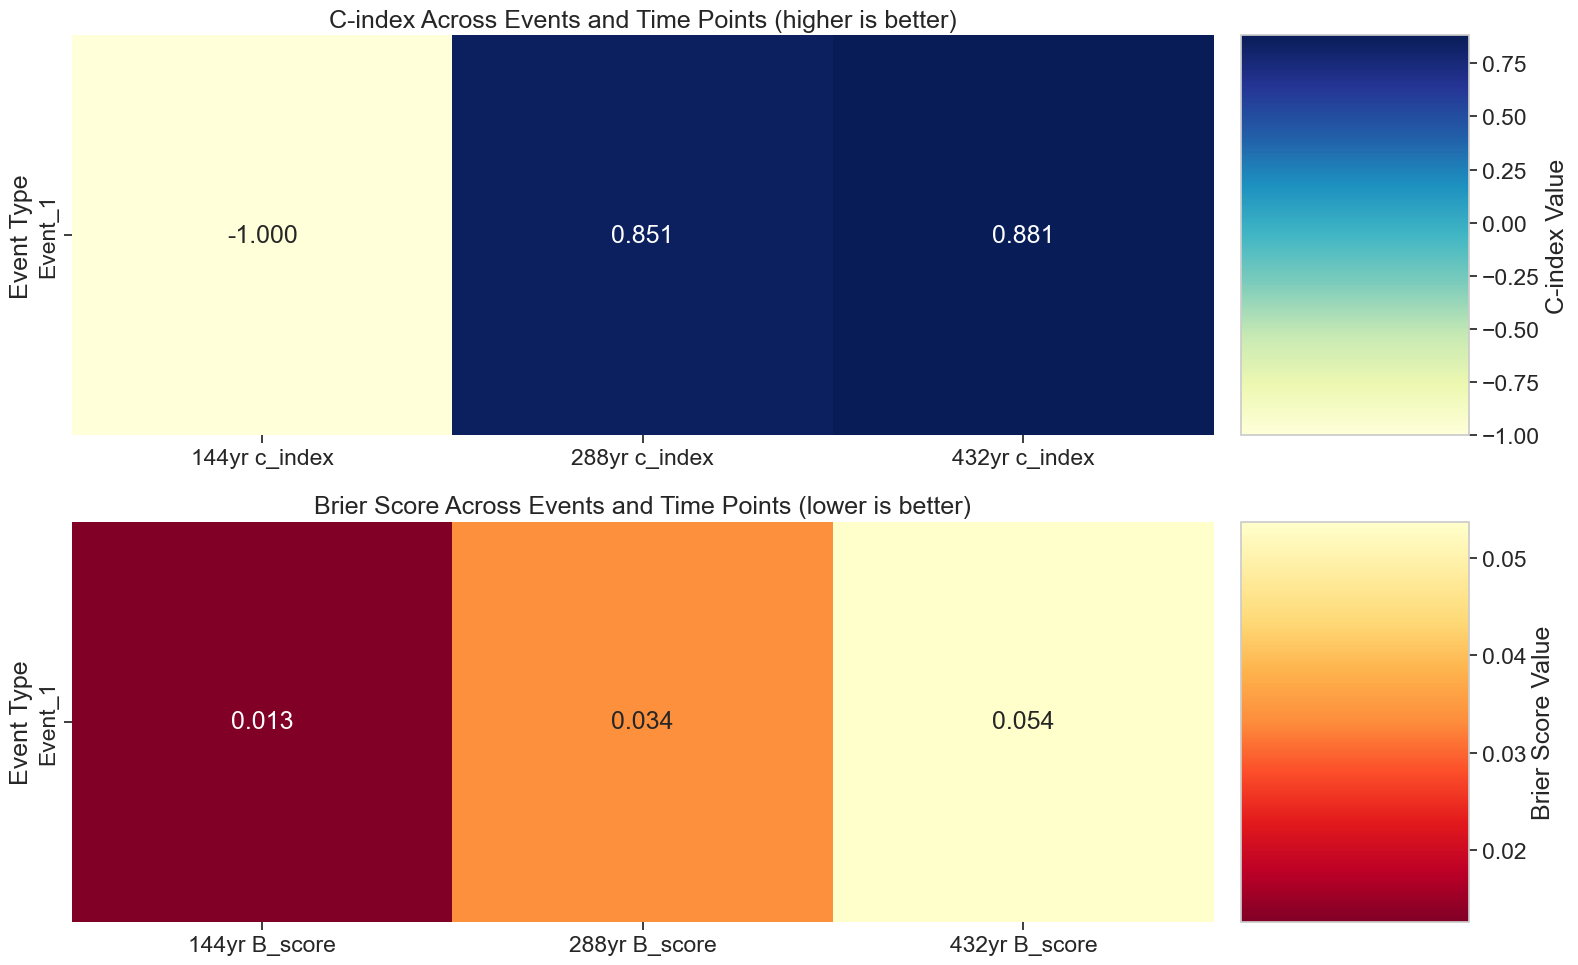

In [9]:
# 4. Heatmap visualization of performance metrics
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(2, 2, width_ratios=[5, 1], height_ratios=[1, 1])

# C-index heatmap
ax1 = plt.subplot(gs[0, 0])
sns.heatmap(df1_mean, annot=True, cmap='YlGnBu', fmt='.3f', ax=ax1, cbar=False)
ax1.set_title('C-index Across Events and Time Points (higher is better)')
ax1.set_ylabel('Event Type')

# C-index colorbar
ax2 = plt.subplot(gs[0, 1])
cbar1 = plt.colorbar(ax1.collections[0], cax=ax2)
cbar1.set_label('C-index Value')

# Brier score heatmap
ax3 = plt.subplot(gs[1, 0])
sns.heatmap(df2_mean, annot=True, cmap='YlOrRd_r', fmt='.3f', ax=ax3, cbar=False)
ax3.set_title('Brier Score Across Events and Time Points (lower is better)')
ax3.set_ylabel('Event Type')

# Brier score colorbar
ax4 = plt.subplot(gs[1, 1])
cbar2 = plt.colorbar(ax3.collections[0], cax=ax4)
cbar2.set_label('Brier Score Value')

plt.tight_layout()
plt.show()

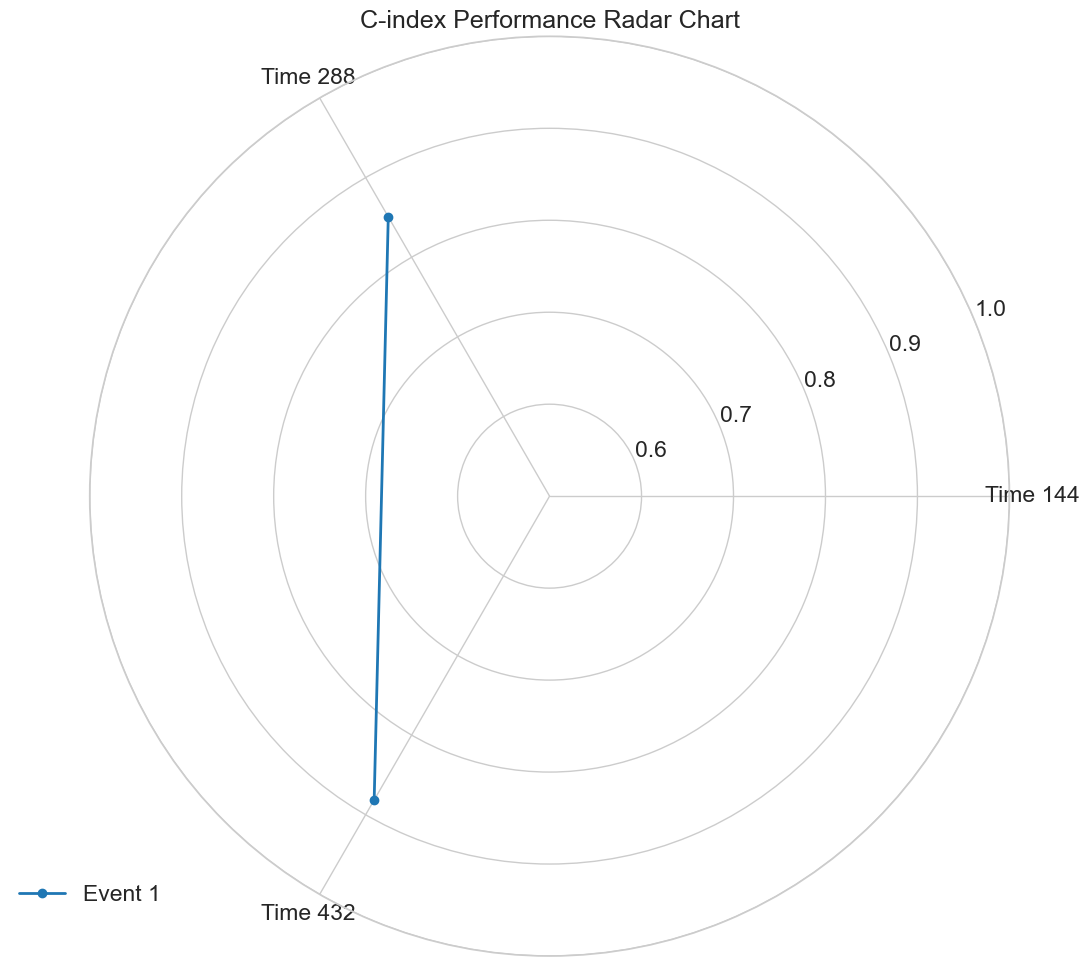

In [10]:
# 5. Radar chart for comparing performance across events
# Prepare data for radar chart
categories = [f'Time {t}' for t in eval_times]
fig = plt.figure(figsize=(12, 10))

# C-index radar chart
ax = plt.subplot(111, polar=True)
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Close the loop

for i in range(num_events):
    values = df1_mean.iloc[i].values.tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Event {i+1}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('C-index Performance Radar Chart')
ax.set_ylim(0.5, 1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()

NameError: name 'linestyle' is not defined

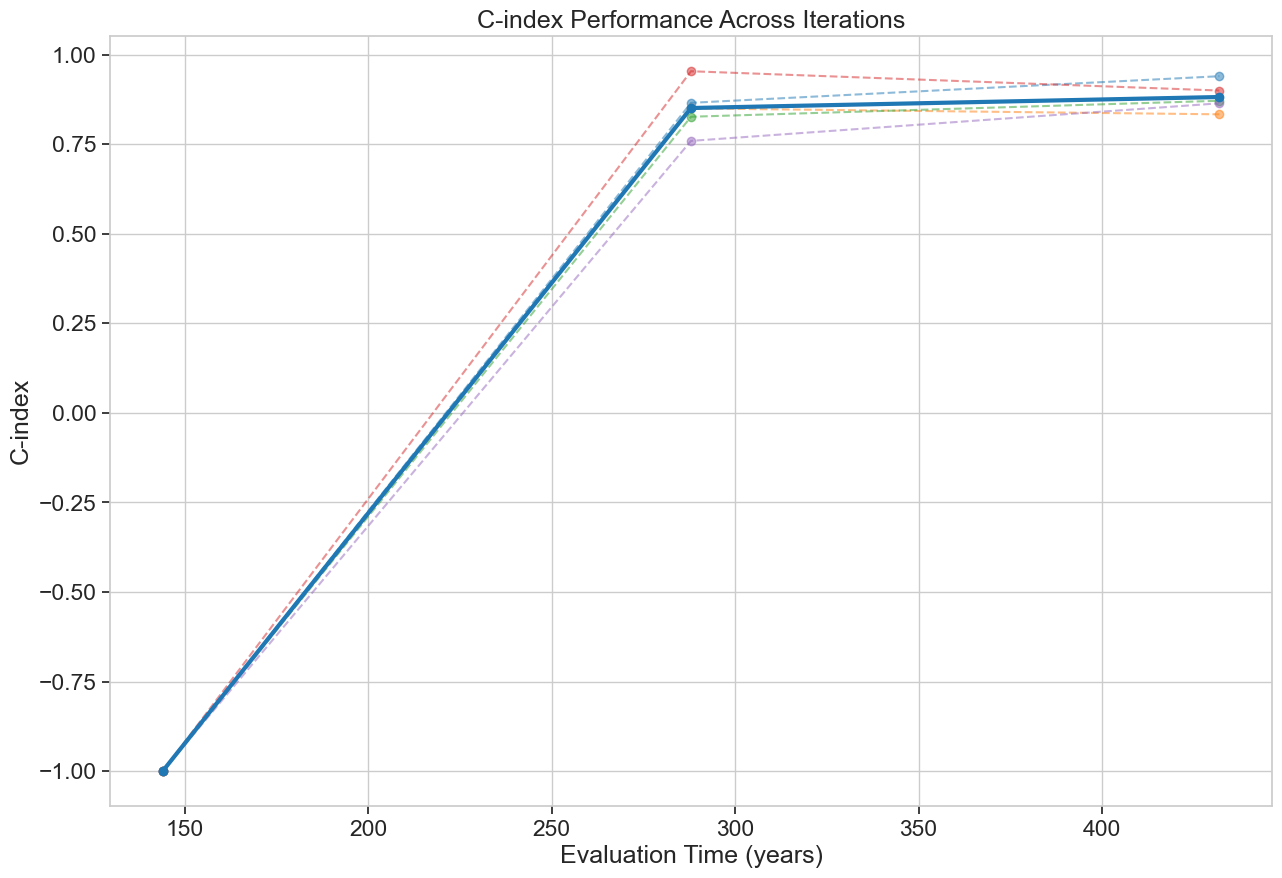

In [12]:
# 6. Comparison of individual iterations
in_path = data_mode + '/results/'
plt.figure(figsize=(15, 10))

# Load and plot individual iteration results
for out_itr in range(5):  # OUT_ITERATION
    try:
        df_itr = pd.read_csv(in_path + f'/result_CINDEX_itr{out_itr}.csv', index_col=0)
        
        for i in range(num_events):
            if out_itr == 0:
                plt.plot(eval_times, df_itr.iloc[i].values, 'o--', alpha=0.5, 
                        label=f'Event {i+1} (Iter {out_itr})')
            else:
                plt.plot(eval_times, df_itr.iloc[i].values, 'o--', alpha=0.5,
                        label=f'Event {i+1} (Iter {out_itr})')
    except:
        print(f"Could not load iteration {out_itr} results")

# Plot the mean as solid lines
for i in range(num_events):
    plt.plot(eval_times, df1_mean.iloc[i].values, 'o-', linewidth=3, 
            label=f'Event {i+1} (Mean)', color=f'C{i}')

plt.xlabel('Evaluation Time (years)')
plt.ylabel('C-index')
plt.title('C-index Performance Across Iterations')
plt.grid(True, linestyle)